<a href="https://colab.research.google.com/github/SaurabhCegian/Data-Science/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
                 header=None,
                 names=['sepal length', 'sepal width', 'petal length', 'petal width', 'class'])

# Features to be standardized
features = ['sepal length', 'sepal width', 'petal length', 'petal width']

# Separating out the features
x = df.loc[:, features].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

# Display Original Data
print("------------Original Data-------------")
print(df.head())
# Display Standardized Data
print("\n------------Standardized Data-------------")
print(pd.DataFrame(x, columns=features).head())


------------Original Data-------------
   sepal length  sepal width  petal length  petal width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

------------standardized Data-------------
   sepal length  sepal width  petal length  petal width
0     -0.900681     1.032057     -1.341272    -1.312977
1     -1.143017    -0.124958     -1.341272    -1.312977
2     -1.385353     0.337848     -1.398138    -1.312977
3     -1.506521     0.106445     -1.284407    -1.312977
4     -1.021849     1.263460     -1.341272    -1.312977


In [6]:
import numpy as np

# Compute the covariance matrix
cov_matrix = np.cov(x.T)

# Display the covariance matrix
print(cov_matrix)


[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


In [7]:
# Calculate the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Display eigenvalues and eigenvectors
print("Eigenvalues:\n", eigenvalues)
print("Eigenvectors:\n", eigenvectors)


Eigenvalues:
 [2.93035378 0.92740362 0.14834223 0.02074601]
Eigenvectors:
 [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


In [9]:
# Sort the eigenvalues and eigenvectors
sorted_index = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_index]
sorted_eigenvectors = eigenvectors[:, sorted_index]

# Display sorted eigenvalues and eigenvectors
print("Sorted Eigenvalues:\n", sorted_eigenvalues)
print("Sorted Eigenvectors:\n", sorted_eigenvectors)

Sorted Eigenvalues:
 [2.93035378 0.92740362 0.14834223 0.02074601]
Sorted Eigenvectors:
 [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


In [10]:
# Project the data onto the principal components
pca_data = np.dot(x, sorted_eigenvectors)

# Convert to DataFrame for better visualization
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2', 'PC3', 'PC4'])

# Display the transformed data
print(pca_df.head())

        PC1       PC2       PC3       PC4
0 -2.264542 -0.505704 -0.121943  0.023073
1 -2.086426  0.655405 -0.227251  0.103208
2 -2.367950  0.318477  0.051480  0.027825
3 -2.304197  0.575368  0.098860 -0.066311
4 -2.388777 -0.674767  0.021428 -0.037397


<ipython-input-11-59265d3b087d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pca['class'] = df['class']


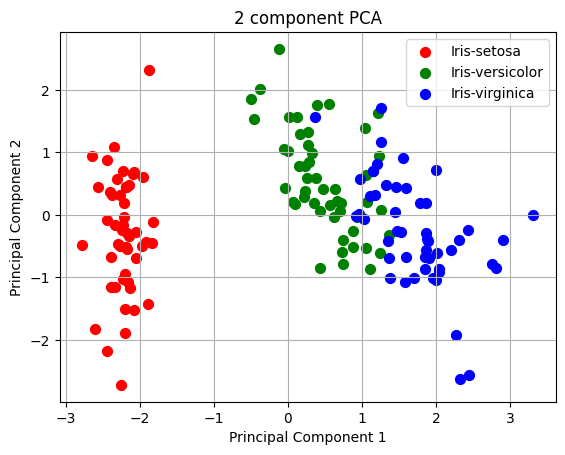

In [11]:
import matplotlib.pyplot as plt

# Select the first two principal components for visualization
pca = pca_df.iloc[:, :2]

# Add the class labels for coloring the scatter plot
pca['class'] = df['class']

# Plot the data
fig, ax = plt.subplots()
colors = ['r', 'g', 'b']
for target, color in zip(df['class'].unique(), colors):
    indices_to_keep = pca['class'] == target
    ax.scatter(pca.loc[indices_to_keep, 'PC1'],
               pca.loc[indices_to_keep, 'PC2'],
               c=color,
               s=50)
ax.legend(df['class'].unique())
ax.grid()
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2 component PCA')
plt.show()
